In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import sys

%matplotlib inline

In [2]:
dataset = 3

filepath = '../contagens/itapoa-0%d.txt' % dataset

if dataset == 1:
    df = pd.read_csv(filepath, names=['Distance'])
    
if dataset == 2:
    raise Exception('Routine not implemented yet!')

if dataset == 3:
    df = pd.read_csv(filepath, names=['Time', 'Distance'], sep=' ')

In [3]:
# Cleaning and transforming

# Changing idle readings to 0
df.loc[df['Distance'] > 8189,'Distance'] = 0

# Padding time to 0
df['Time'] = df['Time'] - df['Time'].min()

df.describe()

,Time,Distance
count,3909.000000,3909.000000
mean,44910.707342,155.808135
std,25991.038453,464.009956
min,0.000000,0.000000
25%,22385.000000,0.000000
50%,44858.000000,0.000000
75%,67405.000000,0.000000
max,90000.000000,2257.000000


In [4]:
IDDLE_DATA = 0
FALSE_NEGATIVE_TOLERANCE = 1
FALSE_POSITIVE_TOLERANCE = 2

seq_count = 0
fn_count = 0

def process_sensor_data(data):
    global seq_count
    global fn_count

    if data == IDDLE_DATA:
        ret = 0
        if fn_count >= FALSE_NEGATIVE_TOLERANCE:
            fn_count = 0
            ret = seq_count if seq_count > FALSE_POSITIVE_TOLERANCE else 0
            seq_count = 0
        else :
            fn_count += 1
            ret = 0
        return ret
    fn_count = 0
    seq_count += 1
    return 0


df['Detection'] = df['Distance'].apply(process_sensor_data)
df.describe()

,Time,Distance,Detection
count,3909.000000,3909.000000,3909.000000
mean,44910.707342,155.808135,0.017140
std,25991.038453,464.009956,0.250818
min,0.000000,0.000000,0.000000
25%,22385.000000,0.000000,0.000000
50%,44858.000000,0.000000,0.000000
75%,67405.000000,0.000000,0.000000
max,90000.000000,2257.000000,5.000000


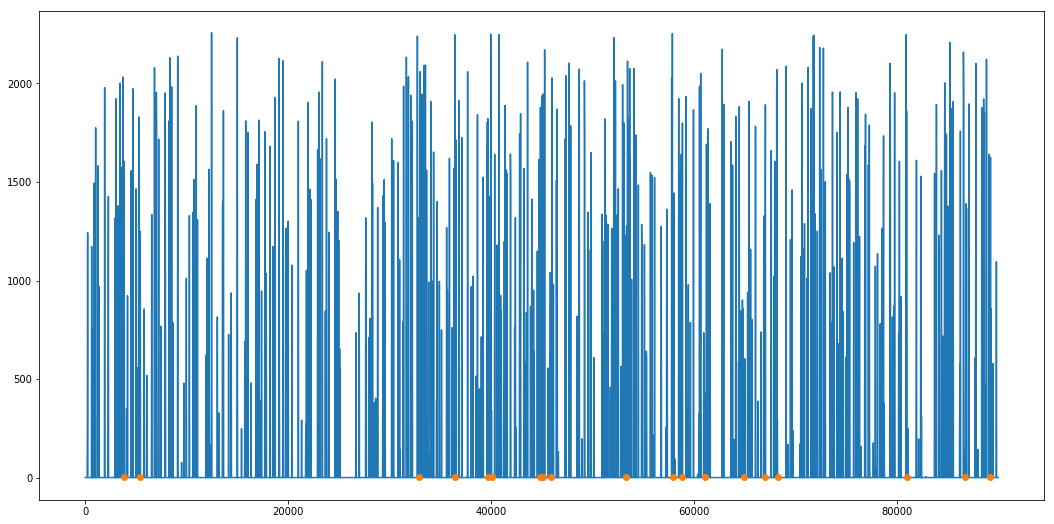

In [5]:
plt.rcParams['figure.figsize'] = (18,9)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['Time'], df['Distance'])
subd = df[df['Detection'] > 0].copy()
ax.plot(subd['Time'], subd['Detection'], 'o');

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

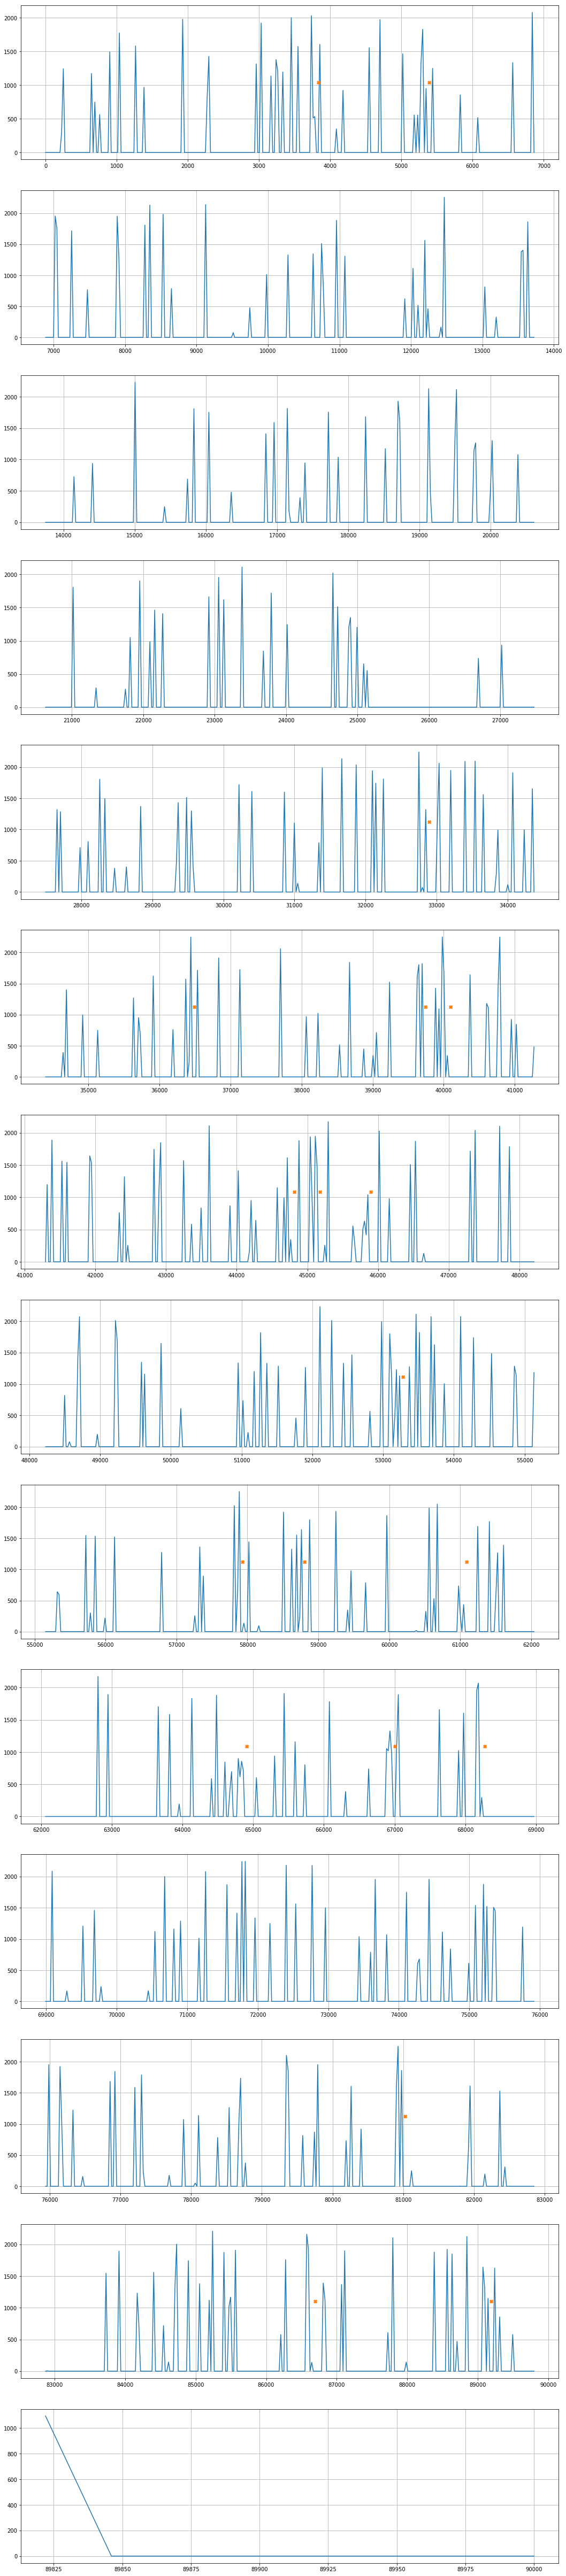

In [13]:
plt.rcParams['figure.figsize'] = (18,88)
win_size = 300
plots = math.ceil(df.shape[0] / win_size)
fig, axes = plt.subplots(nrows=plots, ncols=1)
for i in range(plots):
    m = i * win_size
    n = m + win_size
    subdf = df.iloc[m:n]
    axes[i].grid(True)
    axes[i].plot(subdf['Time'], subdf['Distance'])
    detections = subdf[subdf['Detection'] > 0].copy()
    y = [int(subdf['Distance'].max()/2)] * detections.shape[0]
    axes[i].plot(detections['Time'], y, 'X')
    
plt.show()